## Popular Song Prediction
This notebook explores a dataset of 5,000 songs and uses machine learning to predict if a song will be in the top 25% of streams based on songs features such as
acousticness, Danceability, TikTok Virality, etc.

In [16]:
import pandas as pd
from IPython.core.display_functions import clear_output
from jinja2.nodes import Output
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [17]:
file_path = "music_dataset.csv"
df = pd.read_csv(file_path)
df.head()

,Song,Artist,Streams,Daily Streams,Genre,Release Year,Peak Position,Weeks on Chart,Lyrics Sentiment,TikTok Virality,Danceability,Acousticness,Energy
0,Track 14728,EchoSync,689815326,796199,Trap,2021,81,8,0.20,17,0.11,0.59,0.60
1,Track 21319,The Midnight Howl,457954557,2426710,Electronic,2018,44,99,0.51,30,0.61,0.25,0.71
2,Track 22152,Retro Resonance,217316865,1639915,Reggae,1992,57,12,0.36,11,0.43,0.58,0.20
3,Track 80217,Urban Rhapsody,312747634,3614532,Pop,2000,21,50,0.89,44,0.18,0.04,0.63
4,Track 77204,Sofia Carter,726442597,1028518,Blues,2001,97,9,-0.62,71,0.82,0.59,0.61


## Top 10 Genres
This bar chart will show which genres appear most frequently in the dataset.

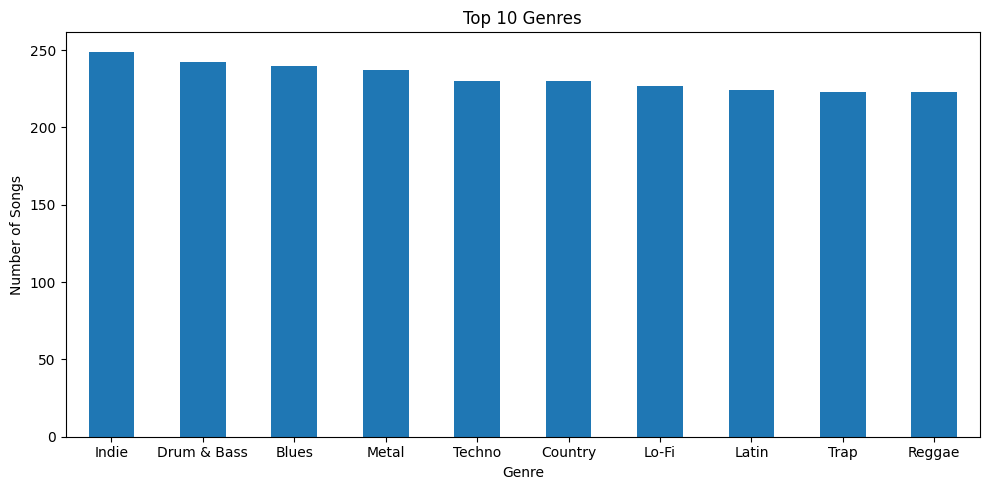

In [18]:
top_genres = df['Genre'].value_counts().head(10)
plt.figure(figsize = (10,5))
top_genres.plot(kind = 'bar')

plt.xlabel("Genre")
plt.ylabel("Number of Songs")
plt.title("Top 10 Genres")
plt.xticks(rotation = 360)
plt.tight_layout()
plt.show()

## Average Streams By Year
This line chart shows the average daily streams of a song by release year.

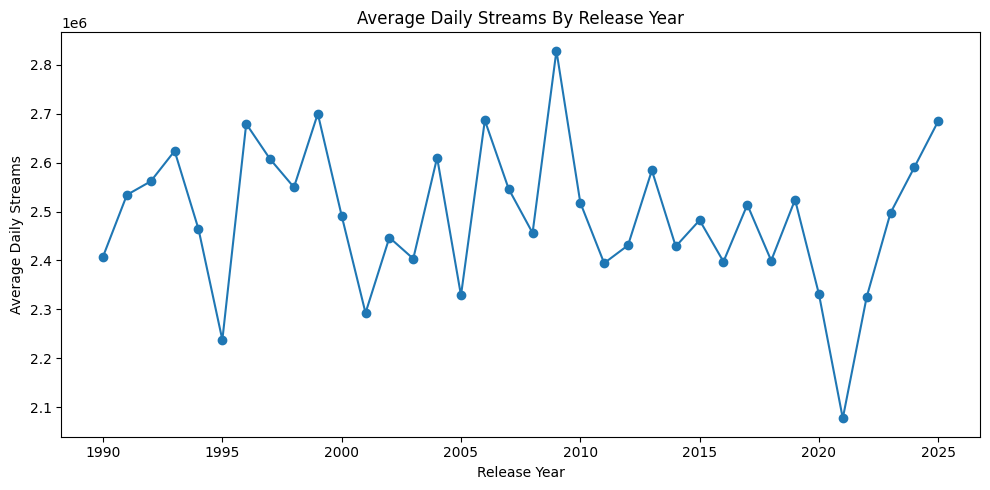

In [19]:
avg_streams = df.groupby('Release Year')['Daily Streams'].mean()
plt.figure(figsize = (10,5))
avg_streams.plot(kind = 'line', marker = 'o')

plt.xlabel("Release Year")
plt.ylabel("Average Daily Streams")
plt.title("Average Daily Streams By Release Year")
plt.tight_layout()
plt.show()

## Top 10 Streamed Artists
The following horizontal bar chart shows the top 10 most streamed artists in this dataset.

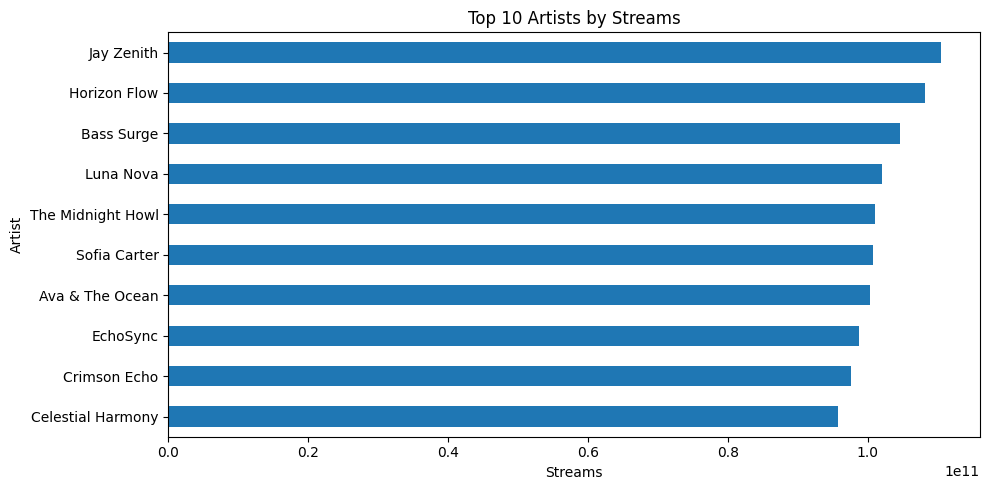

In [20]:
df.groupby('Artist')['Streams'].sum().nlargest(10).plot(kind="barh", figsize=(10,5))
plt.xlabel("Streams")
plt.ylabel("Artist")
plt.title("Top 10 Artists by Streams")
plt.tight_layout()
# Put highest streamed artist on top
plt.gca().invert_yaxis()
plt.show()

## Training the Random Forest Model
This is where we will train a machine learning model to predict if a song will be in the top 25% of streams
using features such as Acousticness, Energy, and Danceability.

#### Define threshold and prepare data.

In [21]:
# Define threshold (top 25% of streams)
threshold = df['Streams'].quantile(0.75)

# Define features
x = df[['Danceability', 'Energy', 'Acousticness', 'TikTok Virality', 'Lyrics Sentiment']]
y = df['Streams'].apply(lambda x: 1 if x >= threshold else 0)

#### Split the data into training and test splits. This model will be trained on 80% of the data
#### and tested on the other 20%.

In [22]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#### Now initialize and train the Random Forest model.

In [23]:
# Initialize and train model
model = RandomForestClassifier(n_estimators = 100, random_state = 0)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

#### Make predictions.

In [24]:
y_pred = model.predict(x_test)

#### Now let's evaluate the model's performance.

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.98      0.86       731
           1       0.40      0.03      0.06       239

    accuracy                           0.75       970
   macro avg       0.58      0.51      0.46       970
weighted avg       0.67      0.75      0.66       970



#### Let's test the model on new data.

In [26]:
def predict_song(input_data):
    input_data = pd.DataFrame([input_data], columns = ['Danceability', 'Energy', 'Acousticness', 'TikTok Virality', 'Lyrics Sentiment'])
    prediction = model.predict(input_data)
    return "Top 25%" if prediction[0] == 1 else "Not Top 25%"

new_song = [0.65, 0.58, 0.21, 14, 0.56]
result = predict_song(new_song)
print("Prediction:", result)

Prediction: Not Top 25%


#### Time to add some interactive features to this project.

In [28]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Slider widgets
danceability = widgets.FloatSlider(value=0.0, min=0.0, max=1.0, step=0.01, description='Danceability')
energy = widgets.FloatSlider(value=0.0, min=0.0, max=1.0, step=0.01, description='Energy')
acousticness = widgets.FloatSlider(value=0.0, min=0.0, max=1.0, step=0.01, description='Acousticness')
virality = widgets.IntSlider(value=0.0, min=0, max=100, step=1, description='TikTok Virality')
lyrics = widgets.FloatSlider(value=0.0, min=-1.0, max=1.0, step=0.01, description='Lyrics')

# Display sliders
display(danceability, energy, acousticness, virality, lyrics)

# Add predict button
predict_button = widgets.Button(description="Predict")

# Initialize to properly display predict output
output=widgets.Output()

# Function for logic from sliders to be applied to predict button
def button_predict(b):
    new_song = [danceability.value, energy.value, acousticness.value, virality.value, lyrics.value]
    result = predict_song(new_song)
    with output:
        clear_output()
        print("Prediction:", result)

predict_button.on_click(button_predict)
display(predict_button, output)

FloatSlider(value=0.0, description='Danceability', max=1.0, step=0.01)

FloatSlider(value=0.0, description='Energy', max=1.0, step=0.01)

FloatSlider(value=0.0, description='Acousticness', max=1.0, step=0.01)

IntSlider(value=0, description='TikTok Virality')

FloatSlider(value=0.0, description='Lyrics', max=1.0, min=-1.0, step=0.01)

Button(description='Predict', style=ButtonStyle())

Output()

#### Conclusion
This notebook took you on a step-by-step walkthrough of my project. We imported a CSV file of 
data full of 5,000 songs and audio features that we used to determine popularity. We 
implemented a machine learning model, trained it, and applied it to new data. Then
we built some widgets so that you, the user, were able to implement your own song feature
scores to predict if that song would be in the top 25% of streams or not, determining if
it's popular.